In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.decomposition import PCA
from numpy import linalg as LA
from  sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [387]:
# Set the style of the seaborn plots
sns.set_style("white")

### Question One

1.3 Use at least one year of daily returns to calculate the correlation matrix for the 30 stocks that are constituents of the Dow Jones Index. MATLAB’s “BlueChipStockMoments” can be used to calculate the correlation matrix. Use this correlation matrix for PCA and construct bar graphs to show the weight of each stock for the first and second principal components. Is the
first or second principal component similar to the market (equal weight on each stock)? Discuss why?

In [388]:
dow30 = ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD',
    'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'RTX', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT', 'XOM']

In [203]:
# Download and select the adjusted closing price data for each of the stocks in the dow30
stock_data = yf.download(dow30, period="1y", interval="1d")["Adj Close"]

[*********************100%%**********************]  30 of 30 completed


In [204]:
# Get the returns for the stocks
stock_data = stock_data.pct_change().dropna()
stock_data.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DOW,GS,HD,...,PFE,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-05,-0.007983,-0.004274,0.012195,-0.015076,-0.007445,-0.024692,-0.035201,-0.005820,-0.023753,-0.024117,...,-0.003536,-0.010092,-0.003267,-0.012293,-0.002089,-0.018285,-0.029073,-0.006509,-0.010247,-0.027398
2022-12-06,-0.025370,-0.008842,-0.036035,-0.018403,-0.015001,-0.025770,-0.037944,-0.003903,-0.023228,-0.008217,...,-0.020106,0.001274,-0.019368,0.006891,0.007999,-0.021528,-0.004856,-0.015045,-0.011606,-0.027796
2022-12-07,-0.013785,0.000453,-0.010817,0.003022,-0.008438,0.002965,-0.001517,-0.006856,-0.008239,0.008505,...,0.010662,0.006431,0.003140,-0.002387,0.006656,-0.006074,0.007590,0.001478,-0.005204,-0.002214
2022-12-08,0.012133,-0.004200,0.014618,0.008472,0.016812,0.005912,0.004341,-0.002761,-0.005112,0.012307,...,0.030653,0.007188,0.004543,0.003206,0.009228,0.006208,-0.001883,0.006150,0.001548,0.007429
2022-12-09,-0.003435,-0.001427,0.002569,-0.015720,-0.010819,-0.031923,0.008968,-0.007120,0.002960,-0.011139,...,-0.001159,-0.002643,-0.012263,-0.011027,-0.015915,-0.001913,0.008086,-0.011491,-0.023323,-0.008427


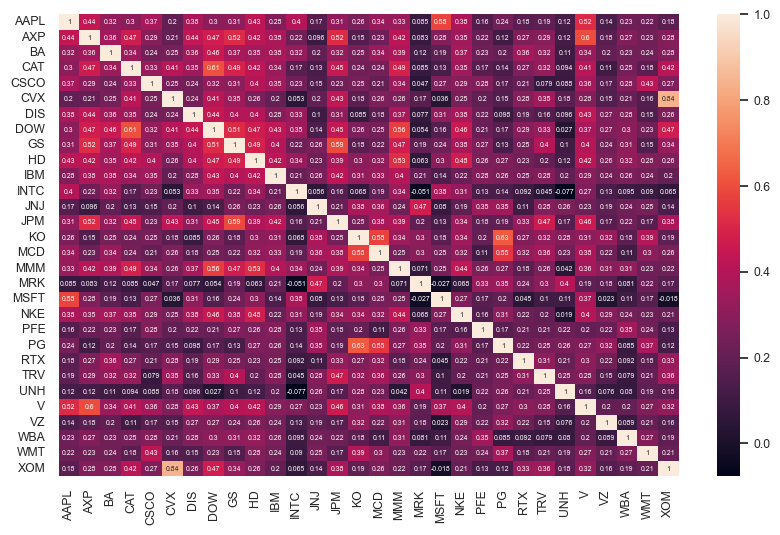

In [205]:
# Get the correlation matrix
price_corr = stock_data.corr()
# Plot the heatmap
sns.set(font_scale=0.8)
plt.figure(figsize=(10,6))
sns.heatmap(price_corr, annot = True, annot_kws={"size": 5})
plt.show()

In [206]:
# Use the scikit learn PCA library to fit the correlation matrix
pca = PCA().fit(stock_data)
# Get the principol components
principal_components = pca.components_
# Get the first and second components
component_one = principal_components[0]
component_two = principal_components[1]

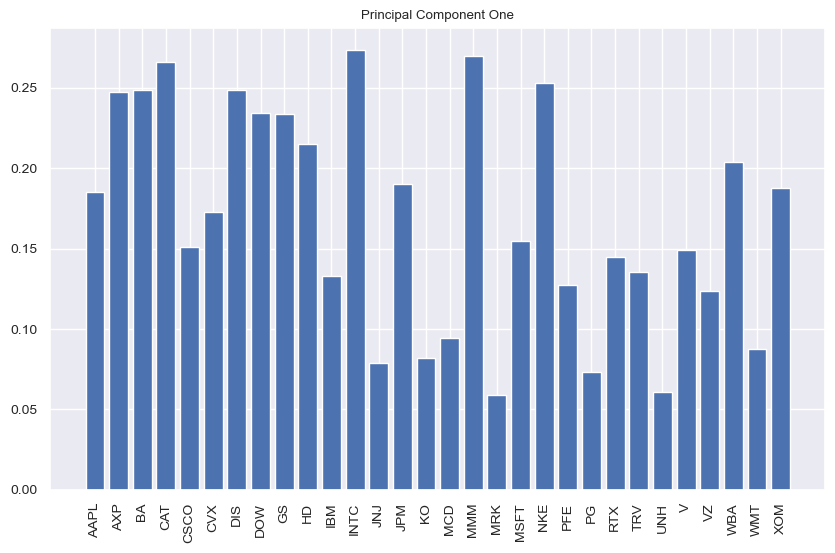

In [207]:
# Plot the first component
plt.figure(figsize = (10,6))
plt.title("Principal Component One")
plt.bar(dow30, component_one, width=0.8)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

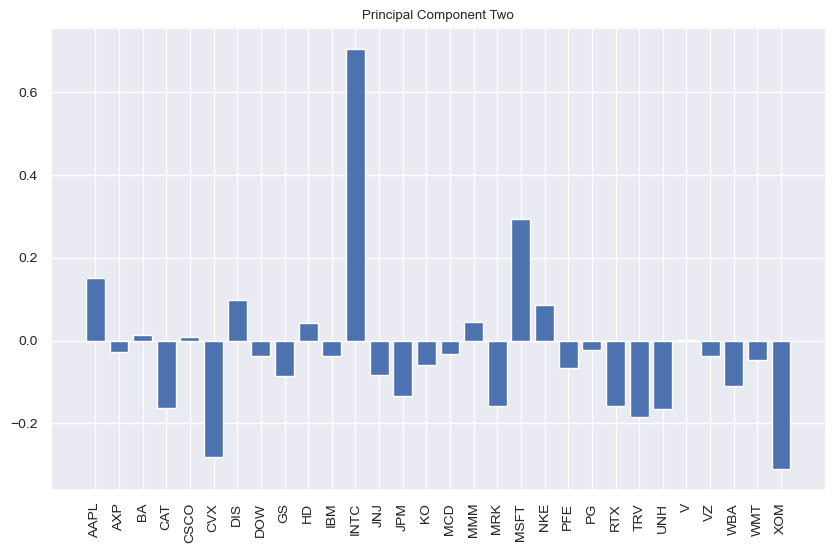

In [208]:
# Plot the second component
plt.figure(figsize = (10,6))
plt.title("Principal Component Two")
plt.bar(dow30, component_two, width=0.8)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

1.4 Calculate the amount of variance explained by each principal component and make a ‘Scree’ plot. How many principal components are required to explain 95% of the variance?

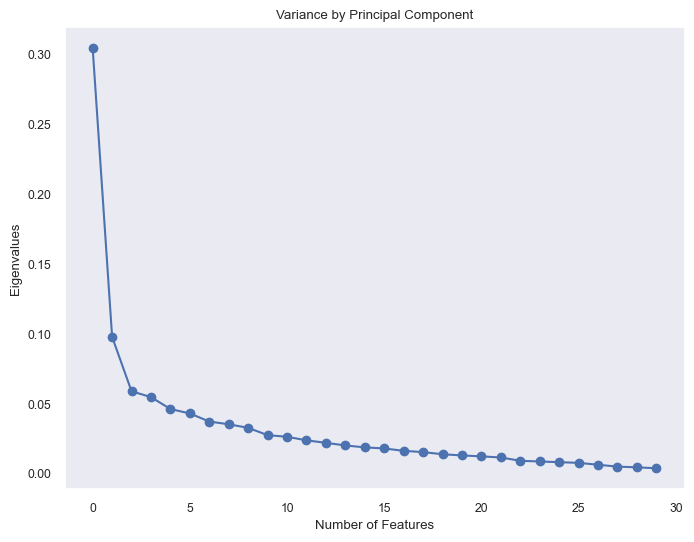

In [209]:
# Get the variance by principal component
variance = pca.explained_variance_ratio_
# Plot the variance by principal component
plt.figure(figsize = (8,6))
plt.title("Variance by Principal Component")
plt.plot(variance, marker="o")
plt.grid()
plt.xlabel("Number of Features")
plt.ylabel("Eigenvalues")
plt.show()

In [210]:
#Get the number of principal components required to explain 95% of the variance
variance_sum = variance.cumsum()
target = 0.95
num_components = 1
for value in variance_sum:
    if value <= target:
        num_components += 1
# Validate the variance at num_components        
print(variance_sum[num_components - 1])

0.956567133881492


In [211]:
print(f"{num_components} principal components required to explain 95% of the variance")

23 principal components required to explain 95% of the variance


1.5 Investigate the scatter plot of the first two principal components and calculate the average of all 30 stocks. Based on Euclidean distances away from this average, identify the three most distant stocks. Can you explain why these stocks are unusual?

In [212]:
# Get the average by principal component
component_one_mean = component_one.mean()
component_two_mean = component_two.mean()

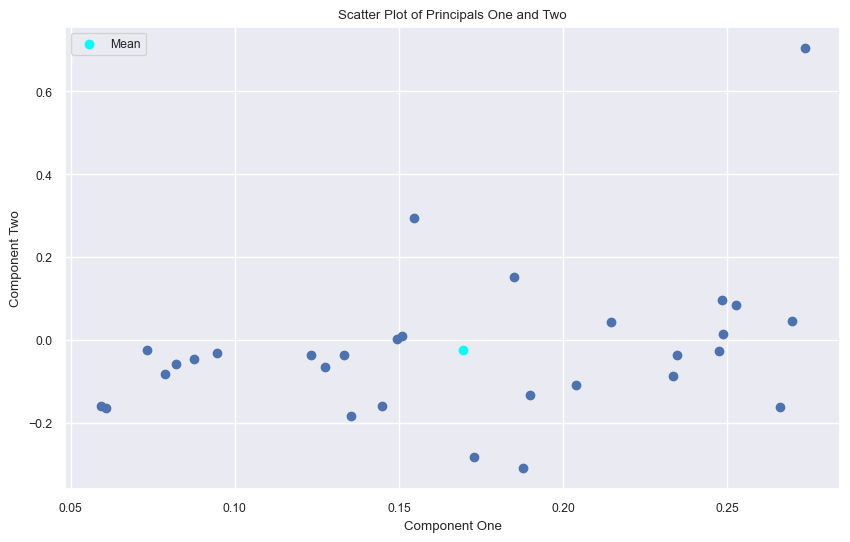

In [213]:
# Plot the scatterplot by principal component
plt.figure(figsize = (10,6))
plt.title("Scatter Plot of Principals One and Two")
plt.scatter(component_one, component_two)
plt.scatter(component_one_mean, component_two_mean, color='cyan', label="Mean")
plt.legend()
plt.xlabel("Component One")
plt.ylabel("Component Two")
plt.show()

In [214]:
# Get the coordinates of each point on the scatterplot and add them to an array
scatterplot_points = np.array([list(point) for point in zip(component_one, component_two)])
# Get the coordinates of the mean point
mean_point = np.array([component_one_mean, component_two_mean])
# Get the distance between the points and the mean point
distances = np.linalg.norm(scatterplot_points - mean_point, axis=1)
# Select the three highest values
top_3_indices = np.argsort(distances)[-3:]
top_3_values = [distances[i] for i in top_3_indices]
# Select the most distant stocks from the dow30 list
stock_one = dow30[top_3_indices[0]]
stock_two = dow30[top_3_indices[1]]
stock_three = dow30[top_3_indices[2]]

print(f"The three most distant stocks are {stock_one}, {stock_two} and {stock_three}")

The three most distant stocks are XOM, MSFT and INTC


### Question Two

2.3. Use the correlation matrix from question (1.3) above to provide pairwise distances between the 30 stocks. Give the formula for this rescaled distance and provide an interpretation of small and large distances.

In [236]:
corr_pairwise_distance = pairwise_distances(np.array(price_corr), metric='correlation')

30

2.4. Construct a horizontal dendrogram using the average linkage approach, carefully labelling the graphic with the names of the 30 stocks.

C:\Users\Sama\AppData\Local\Temp\ipykernel_19124\648756398.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = sch.linkage(corr_pairwise_distance, method="average")


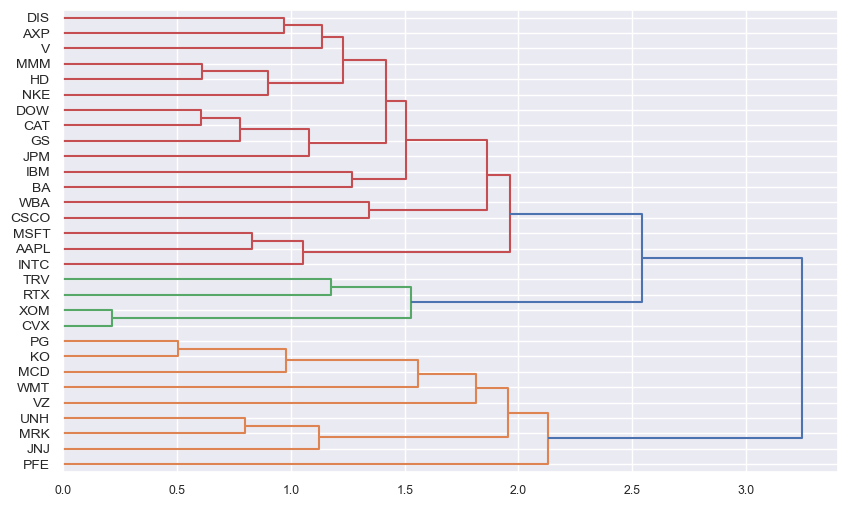

In [292]:
linkage = sch.linkage(corr_pairwise_distance, method="average")
plt.figure(figsize = (10,6))
corr_dendrogram = sch.dendrogram(linkage, orientation='right', labels=dow30)

2.5. Use the dendrogram to provide a few clusters of stocks and list the stocks that are members of each cluster. Can you provide a description of each cluster and relate it to industrial sectors such as Financials, Energy etc?

In [384]:
#Create the clusters from the dendrogram
clusters = sch.fcluster(linkage, t=3, criterion='maxclust')
# Create a dataframe of the data
plot_df = pd.DataFrame(zip(component_one, component_two, clusters))
plot_df = plot_df.rename(columns={0: 'One', 1: 'Two', 2: 'Cluster'})

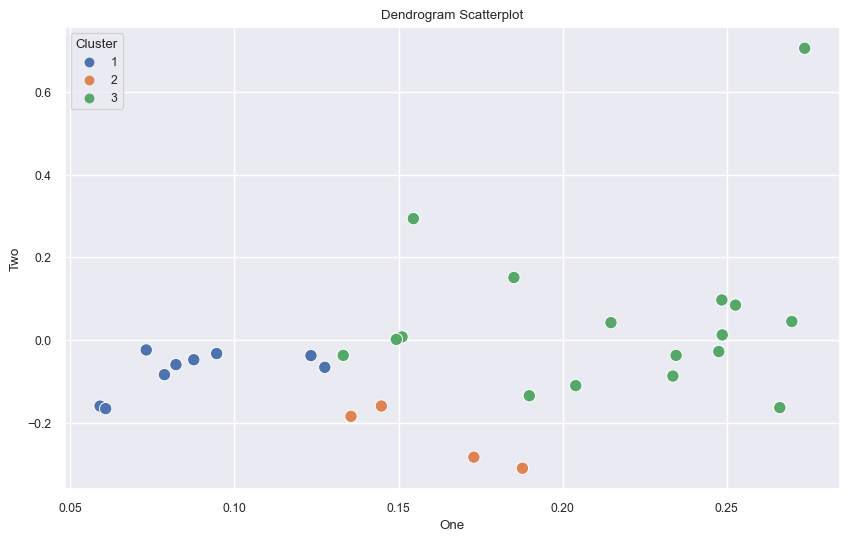

In [385]:
# Plot the scatterplot using the dendrogram
plt.figure(figsize = (10,6))
plt.title("Dendrogram Scatterplot")
sns.scatterplot(data = plot_df, x="One", y="Two", hue="Cluster", palette="deep", s=80)
plt.show()

### Question Three

3.4 Construct a random forest (RF) model and apply this to the Titanic dataset. Explain how
you selected the optimal number of trees and support your choice using a graph

In [392]:
# Load the dataset
titanic_data = pd.read_csv('titanic3.csv')[["age", "sex", "pclass", "survived"]]
titanic_data.head()

,age,sex,pclass,survived
0,29.00,female,1,1
1,0.92,male,1,1
2,2.00,female,1,0
3,30.00,male,1,0
4,25.00,female,1,0


In [399]:
# Encode the 'sex' data
label_encoder = LabelEncoder()
titanic_data['sex enc'] = label_encoder.fit_transform(titanic_data['sex'])

# Prepare the x and Y data
titanic_X = titanic_data.drop(['survived', 'sex'], axis = 1)
titanic_y = titanic_data[["survived"]]

# Spilt the data into train and test

In [ ]:
rfClassifier = RandomForestClassifier(n_estimators = 10)

3.5 Undertake a ROC analysis and show how the RF performs relative to the previous models (logistic regression, classification tree and KNN). Provide evidence to show as clearly as possible which model is best for classifying survival on the Titanic.

### Question Four

4.2 Construct a random forest (RF) model for the red wine dataset and show how the optimal
number of leafs was estimated.